<a href="https://colab.research.google.com/github/Angeal13/Customer_Preservation/blob/main/08_Dec_Customer_Retention_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Background`

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

`Objective`

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.(Accuracy)

`Data`

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Dictionary**

* RowNumber: Row number.
* CustomerId: Unique identification key for different customers.
* Surname: Surname of the customer
* Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* Geography: The country to which the customer belongs.
* Gender: The gender of the customer.
* Age: Age of the customer.
* Tenure: The period of time a customer has been associated with the bank.
* Balance: The account balance (the amount of money deposited in the bank account) of the customer.
* NumOfProducts: How many accounts, bank account affiliated products the person has.
* HasCrCard: Does the customer have a credit card through the bank?
* IsActiveMember: Subjective, but for the concept
* EstimatedSalary: Estimated salary of the customer.
* Exited: Did they leave the bank after all?***(Output)***


#Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
#Use of Helper Functions For callbacks to get the best weights
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-05 01:39:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-05 01:39:59 (92.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Work Assignment /08_Dec/bank.csv')

In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Interpret that they are namesake

In [ ]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [ ]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#EDA

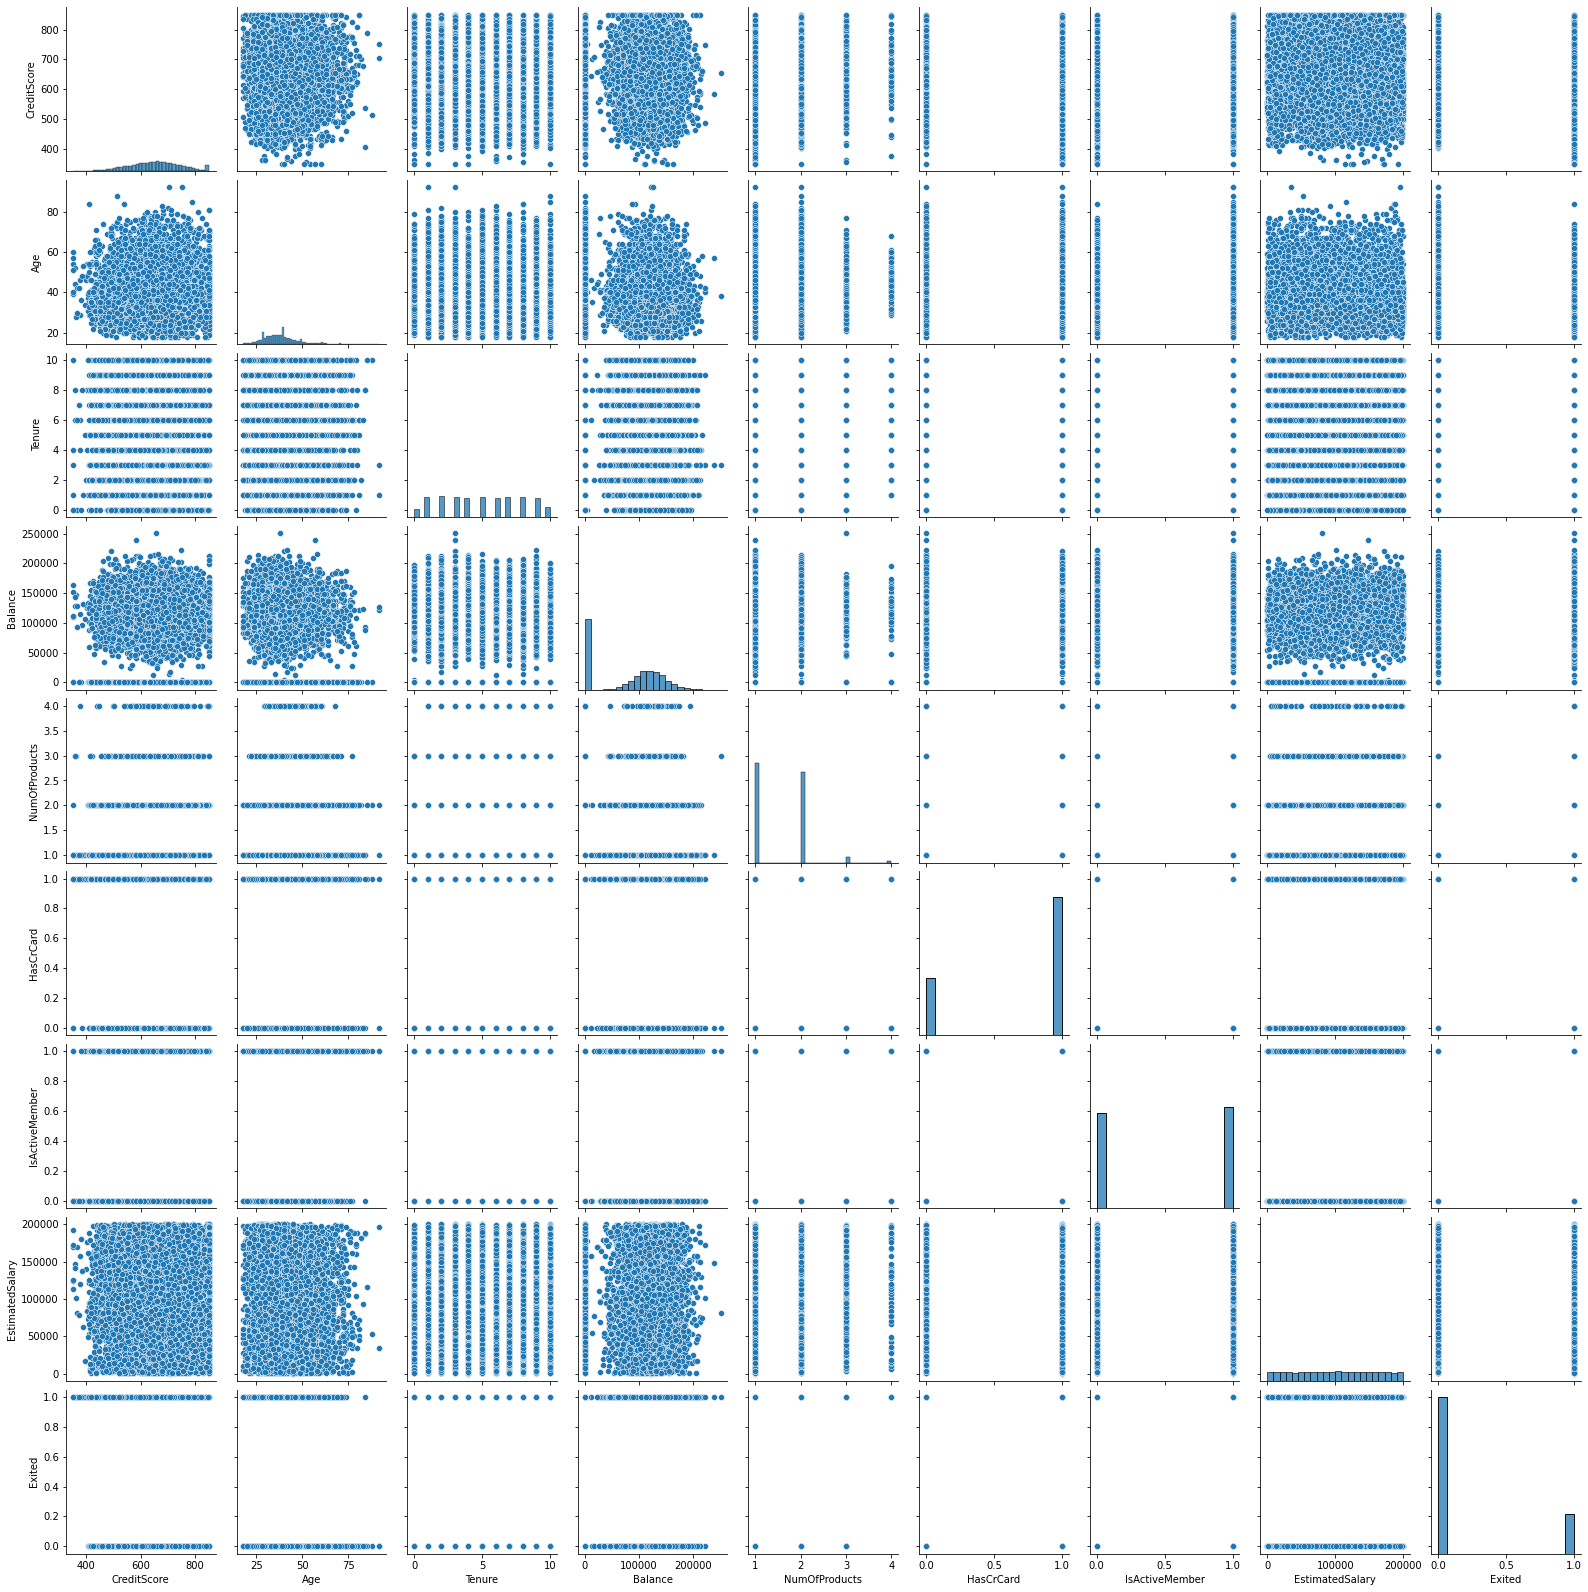

In [ ]:
sns.pairplot(data)

###Exited distibution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


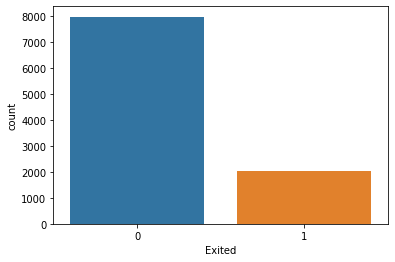

In [ ]:
sns.countplot(data['Exited'])

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
data['Exited'].value_counts()/len(data)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
exited=2037

20.37% of peolpe exited the bank

###Credit

Since it seems that credit does not reveal alot,it migtbe optimal tto cut it

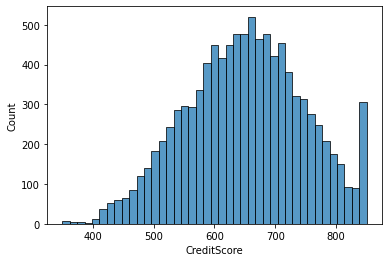

In [ ]:
sns.histplot(data['CreditScore'])

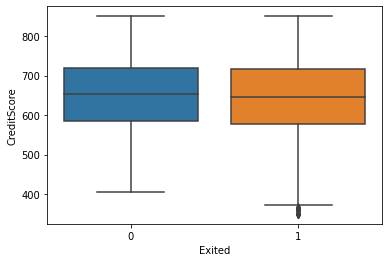

In [ ]:
sns.boxplot(x=data['Exited'],y=data['CreditScore'])

Cut CreditScore with the bins of Fico Scores

https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/

In [ ]:
Bins=[0,580,670,740,800,max(data['CreditScore'])]
Labels=['P','F','G','VG','E']
data['CreditScore_Classification']=pd.cut(data['CreditScore'],bins=Bins,labels=Labels,)

In [ ]:
data['CreditScore_Classification'].astype('category')

0        F
1        F
2        P
3        G
4        E
        ..
9995    VG
9996     P
9997     G
9998    VG
9999    VG
Name: CreditScore_Classification, Length: 10000, dtype: category
Categories (5, object): ['P' < 'F' < 'G' < 'VG' < 'E']

In [ ]:
data.groupby('CreditScore_Classification')['Exited'].sum()

CreditScore_Classification
P     530
F     683
G     451
VG    246
E     127
Name: Exited, dtype: int64

In [ ]:
data.groupby('CreditScore_Classification')['Exited'].sum()/exited

CreditScore_Classification
P     0.260187
F     0.335297
G     0.221404
VG    0.120766
E     0.062347
Name: Exited, dtype: float64

In [ ]:
data['CreditScore_Classification'].value_counts()

F     3350
G     2397
P     2393
VG    1215
E      645
Name: CreditScore_Classification, dtype: int64

In [ ]:
data['CreditScore_Classification'].value_counts()/len(data)

F     0.3350
G     0.2397
P     0.2393
VG    0.1215
E     0.0645
Name: CreditScore_Classification, dtype: float64

In [ ]:
data.groupby('CreditScore_Classification')['Exited'].sum()/data['CreditScore_Classification'].value_counts()

P     0.221479
F     0.203881
G     0.188152
VG    0.202469
E     0.196899
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


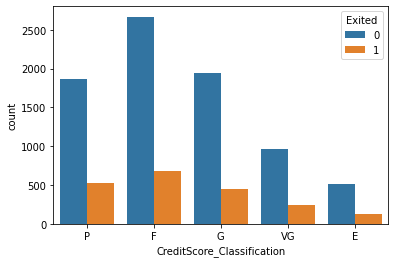

In [ ]:
sns.countplot(data['CreditScore_Classification'],hue=data['Exited'])

* 22.15% of P scorers leave
* 20.39% of F scorers leave
* 18.82% of G Scorers leave
* 20.25% of VG scorer leave
* 19.69% of E Socrers Leave

There are more F Scorers,howevere, the larges percetile of people leaving per category are the P,F,VG


###Gender

In [ ]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
data['Gender'].value_counts()/len(data)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [ ]:
data.groupby('Gender')['Exited'].sum()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

In [ ]:
data.groupby('Gender')['Exited'].sum()/exited

Gender
Female    0.559156
Male      0.440844
Name: Exited, dtype: float64

In [ ]:
data.groupby('Gender')['Exited'].sum()/data['Gender'].value_counts()

Female    0.250715
Male      0.164559
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


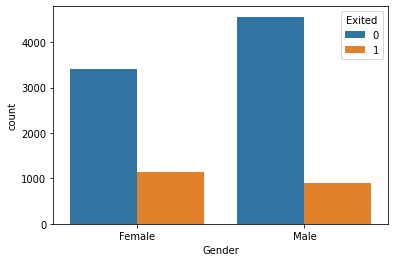

In [ ]:
sns.countplot(data['Gender'],hue=data['Exited'])

Very well distributed data acros Gender

###Salary

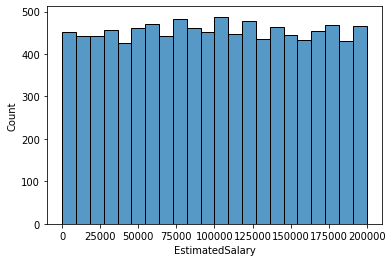

In [ ]:
sns.histplot(data['EstimatedSalary'])

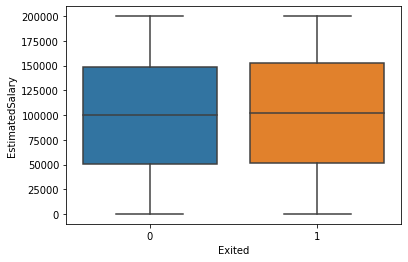

In [ ]:
sns.boxplot(x=data['Exited'],y=data['EstimatedSalary'])

Most salaries are flattened(It can be declaired non countable(can be ignored)


Bin the Credi Score and classify to see what it can project

https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/


###Balance

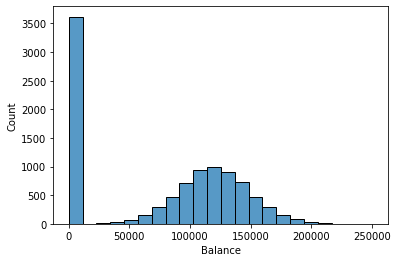

In [ ]:
sns.histplot(data['Balance'])

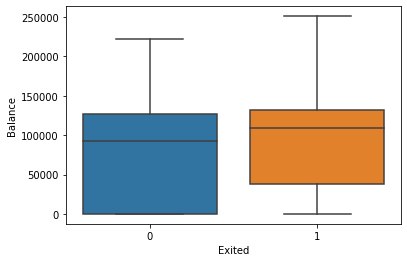

In [ ]:
sns.boxplot(x=data['Exited'],y=data['Balance'])

* Most peole have 0
* People start toi leave when their balance reaches 50K or higher

###Geography

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


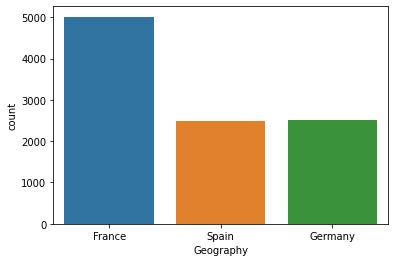

In [ ]:
sns.countplot(data['Geography'])

In [ ]:
data['Geography'].value_counts()/len(data['Geography'])

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [ ]:
data.groupby('Geography').sum()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,3257437,193098,25093,3.113325e+08,7676,3543,2591,5.008945e+08,810
Germany,1634497,99787,12570,3.004029e+08,3813,1791,1248,2.536936e+08,814
Spain,1613354,96333,12465,1.531236e+08,3813,1721,1312,2.463143e+08,413


In [ ]:
exited=2037

In [ ]:
data.groupby('Geography')['Exited'].sum()/exited

Geography
France     0.397644
Germany    0.399607
Spain      0.202749
Name: Exited, dtype: float64

Althought France has 50.14% of the clients.
39.96% of the exiting clients come from Germany

In [ ]:
data.groupby('Geography')['Exited'].sum()/data['Geography'].value_counts()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


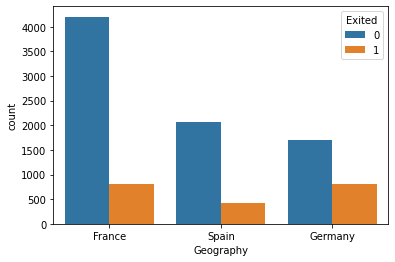

In [ ]:
sns.countplot(data['Geography'],hue=data['Exited'])

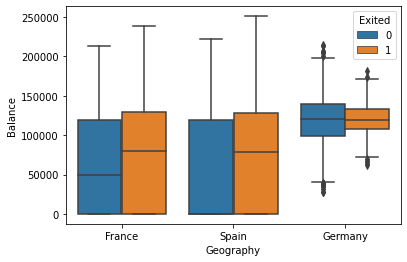

In [ ]:
sns.boxplot(x=data['Geography'],y=data['Balance'],hue=data['Exited'])

It apears that most people that exited were from Germany, al though most of clients are in France

###Active Members

In [ ]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
data.groupby('IsActiveMember')['Exited'].sum()

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

In [ ]:
data.groupby('IsActiveMember')['Exited'].sum()/exited

IsActiveMember
0    0.639175
1    0.360825
Name: Exited, dtype: float64

In [ ]:
data.groupby('IsActiveMember')['Exited'].sum()/data['IsActiveMember'].value_counts()

0    0.268509
1    0.142691
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


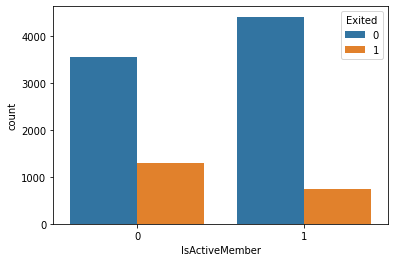

In [ ]:
sns.countplot(data['IsActiveMember'],hue=data['Exited'])

* 63.92% of people that left where inactive which where 26.85% of its group
* 36.08% of people that left where active which where 14.26 of its group

###Age

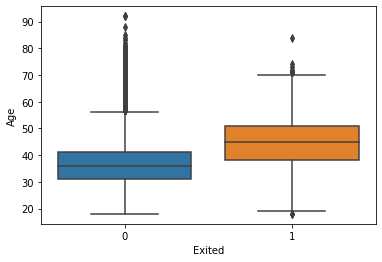

In [ ]:
sns.boxplot(x=data['Exited'],y=data['Age'])

Around 4 or older have more probability of leaving(Check the reson Why there are leaving)

###Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


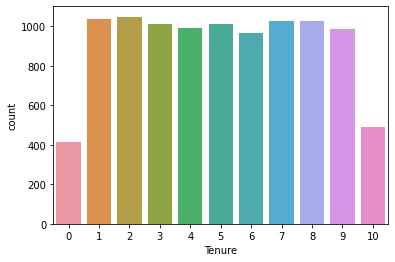

In [ ]:
sns.countplot(data['Tenure'])

In [ ]:
data.groupby('Tenure')['Exited'].sum()/len(data)

Tenure
0     0.0095
1     0.0232
2     0.0201
3     0.0213
4     0.0203
5     0.0209
6     0.0196
7     0.0177
8     0.0197
9     0.0213
10    0.0101
Name: Exited, dtype: float64

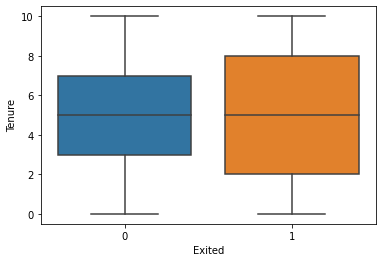

In [ ]:
sns.boxplot(x=data['Exited'],y=data['Tenure'])

Tenure can be ignored,since along all Tnures people leave in the smae capacities

###NumofProducts

In [ ]:
data['NumOfProducts'].value_counts()/len(data)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

In [ ]:
data.groupby('NumOfProducts')['Exited'].sum()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

In [ ]:
data.groupby('NumOfProducts')['Exited'].sum()/exited

NumOfProducts
1    0.691703
2    0.170839
3    0.108002
4    0.029455
Name: Exited, dtype: float64

In [ ]:
data.groupby('NumOfProducts')['Exited'].sum()/data['NumOfProducts'].value_counts()

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
dtype: float64

* 27.71% of people with 1 Product leave
* 7.58% of people with 2 products leave
* 82.70% of people with 3 products leave
* 100% of people wwith 4 products leave



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


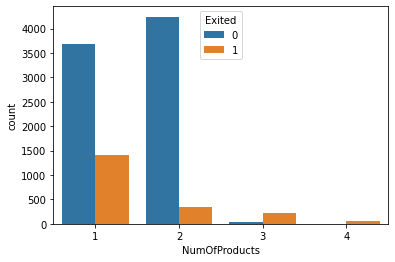

In [ ]:
sns.countplot(data['NumOfProducts'],hue=data['Exited'])

###Correlation Matrix

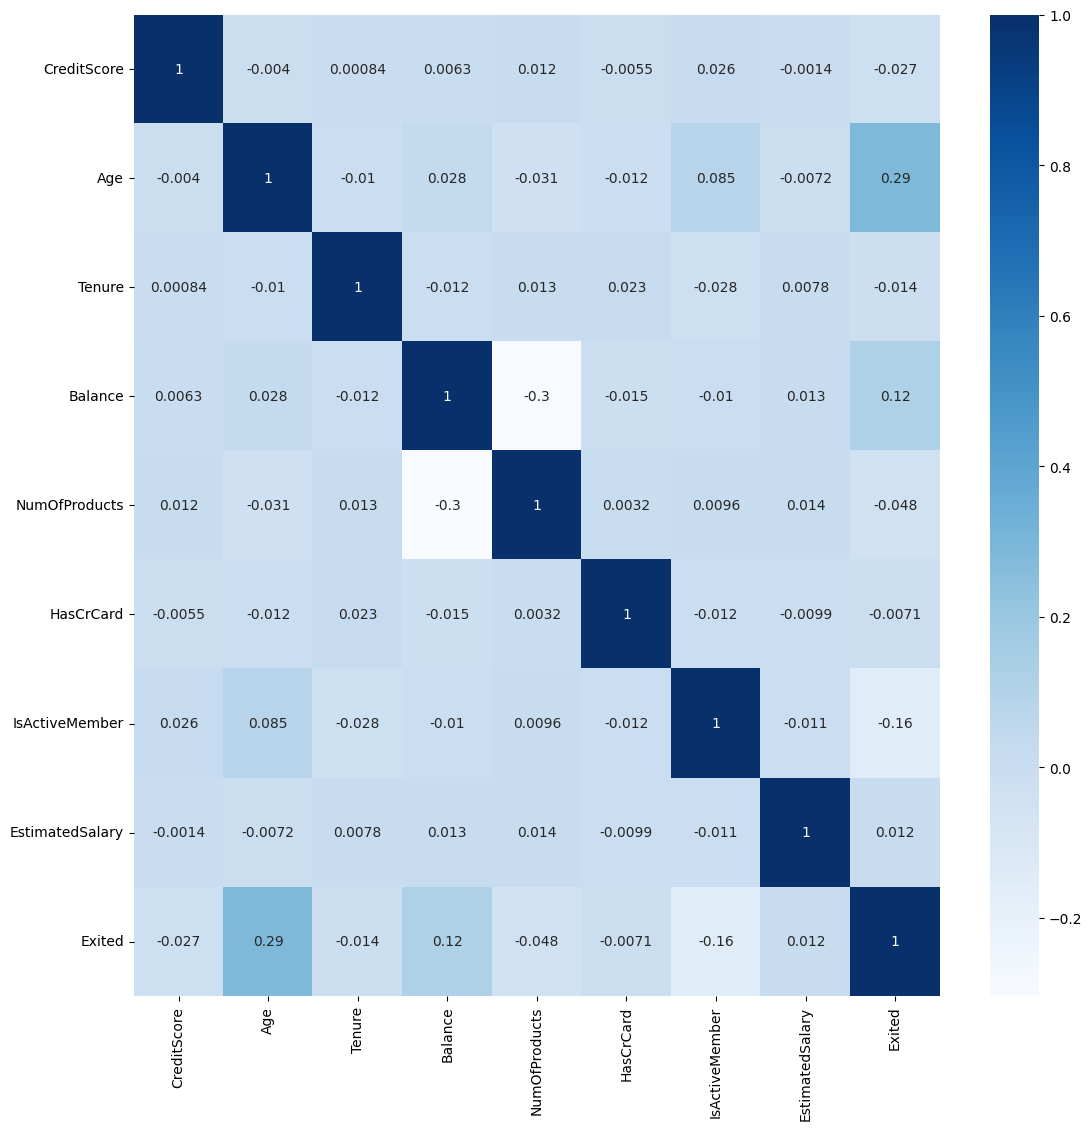

In [ ]:
plt.figure(figsize=(13,13),dpi=100)
sns.heatmap(data.corr(),cmap='Blues',annot=True)

#Modeling

Remove Tenure,Salary,credit so

In [ ]:
def create_model_checkpoint(model_name,save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

One hot encode

In [ ]:
data_mod=data.copy()
data_mod=data_mod.drop(['CreditScore','EstimatedSalary','Tenure','CreditScore_Classification'],axis=1)
data_mod=pd.get_dummies(data_mod)

In [ ]:
X=data_mod.drop('Exited',axis=1)
y=data_mod['Exited']

In [ ]:
X.head(10)

,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,42,0.00,1,1,1,1,0,0,1,0
1,41,83807.86,1,0,1,0,0,1,1,0
2,42,159660.80,3,1,0,1,0,0,1,0
3,39,0.00,2,0,0,1,0,0,1,0
4,43,125510.82,1,1,1,0,0,1,1,0
5,44,113755.78,2,1,0,0,0,1,0,1
6,50,0.00,2,1,1,1,0,0,0,1
7,29,115046.74,4,1,0,0,1,0,1,0
8,44,142051.07,2,0,1,1,0,0,0,1
9,27,134603.88,1,1,1,1,0,0,0,1


In [ ]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

Train Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
def get_model_predictions(model,X):
  return tf.round((model.predict(X_test)))

In [ ]:
epochs=20

##Base Model: Scikit_Learn Regresion model

In [ ]:
model_0=LogisticRegression(random_state=1)

In [ ]:
model_0.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
model_0.score(X_test,y_test)

0.791

##Model_1: NN_1

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Balance            10000 non-null  float64
 2   NumOfProducts      10000 non-null  int64  
 3   HasCrCard          10000 non-null  int64  
 4   IsActiveMember     10000 non-null  int64  
 5   Geography_France   10000 non-null  uint8  
 6   Geography_Germany  10000 non-null  uint8  
 7   Geography_Spain    10000 non-null  uint8  
 8   Gender_Female      10000 non-null  uint8  
 9   Gender_Male        10000 non-null  uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 439.6 KB


In [ ]:
shape=len(X.columns)

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='relu')(inputs)
x=layers.Dense(50,activation='relu')(x)
x=layers.Dense(25,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_1=Model(inputs,outputs,name='model_1')


In [ ]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(X_train,y_train,epochs=epochs,verbose=1,batch_size=256,callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/20
28/28 [==============================] - 1s 3ms/step - loss: 753.1698 - accuracy: 0.7139
Epoch 2/20
28/28 [==============================] - 0s 3ms/step - loss: 105.4487 - accuracy: 0.7254
Epoch 3/20
28/28 [==============================] - 0s 3ms/step - loss: 168.3605 - accuracy: 0.7307
Epoch 4/20
28/28 [==============================] - 0s 3ms/step - loss: 138.5425 - accuracy: 0.7017
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 43.5465 - accuracy: 0.7153
Epoch 6/20
28/28 [==============================] - 0s 3ms/step - loss: 82.0493 - accuracy: 0.7119
Epoch 7/20
28/28 [==============================] - 0s 4ms/step - loss: 85.3451 - accuracy: 0.7274
Epoch 8/20
28/28 [==============================] - 0s 3ms/step - loss: 132.7145 - accuracy: 0.7143
Epoch 9/20
28/28 [==============================] - 0s 3ms/step - loss: 81.0527 - accuracy: 0.7213
Epoch 10/20
28/28 [==============================] - 0s 3ms/step - loss: 103.3328 - accuracy: 0.7101
Epo

##Model_2: Scalled data

In [ ]:
scaler=StandardScaler().fit(X_train)

In [ ]:
X_train=scaler.transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='relu')(inputs)
x=layers.Dense(50,activation='relu')(x)
x=layers.Dense(25,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_2=Model(inputs,outputs,name='model_2')


In [ ]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_2=model_2.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4413 - accuracy: 0.8084 - val_loss: 0.3896 - val_accuracy: 0.8307
Epoch 2/20
175/175 [==============================] - 1s 7ms/step - loss: 0.3700 - accuracy: 0.8477 - val_loss: 0.3455 - val_accuracy: 0.8521
Epoch 3/20
175/175 [==============================] - 2s 9ms/step - loss: 0.3475 - accuracy: 0.8596 - val_loss: 0.3412 - val_accuracy: 0.8564
Epoch 4/20
175/175 [==============================] - 1s 7ms/step - loss: 0.3447 - accuracy: 0.8616 - val_loss: 0.3411 - val_accuracy: 0.8564
Epoch 5/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.8561 - val_loss: 0.3439 - val_accuracy: 0.8536
Epoch 6/20
175/175 [==============================] - 1s 7ms/step - loss: 0.3381 - accuracy: 0.8612 - val_loss: 0.3329 - val_accuracy: 0.8564
Epoch 7/20
175/175 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8618 - val_loss: 0.3338 - val_accuracy: 0.8586
Epoch 

In [ ]:
model_2=tf.keras.models.load_model('/content/model_experiments/model_2')

In [ ]:
model_2.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8603


[0.3421725928783417, 0.8603333234786987]

##Model_3. Adding more layers

In [ ]:
shape

10

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='relu')(inputs)
x=layers.Dense(50,activation='relu')(x)
x=layers.Dense(25,activation='relu')(x)
x=layers.Dense(12,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_3=Model(inputs,outputs,name='model_3')


In [ ]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_3=model_3.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4441 - accuracy: 0.8086 - val_loss: 0.3774 - val_accuracy: 0.8443
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3592 - accuracy: 0.8543 - val_loss: 0.3459 - val_accuracy: 0.8543
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3466 - accuracy: 0.8586 - val_loss: 0.3414 - val_accuracy: 0.8557
Epoch 4/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3415 - accuracy: 0.8614 - val_loss: 0.3431 - val_accuracy: 0.8507
Epoch 5/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8621 - val_loss: 0.3424 - val_accuracy: 0.8500
Epoch 6/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3363 - accuracy: 0.8607 - val_loss: 0.3385 - val_accuracy: 0.8543
Epoch 7/20
175/175 [==============================] - 2s 10ms/step - loss: 0.3316 - accuracy: 0.8618 - val_loss: 0.3367 - val_accuracy: 0.8514
Epoch

In [ ]:
odel_3=tf.keras.models.load_model('/content/model_experiments/model_3')

In [ ]:
model_3.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8623


[0.34583228826522827, 0.862333357334137]

##Model_4: Use of different Acitvations(tanh) on all layers

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='tanh')(inputs)
x=layers.Dense(50,activation='tanh')(x)
x=layers.Dense(25,activation='tanh')(x)
x=layers.Dense(12,activation='tanh')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_4=Model(inputs,outputs,name='model_4')


In [ ]:
model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_4=model_4.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4408 - accuracy: 0.8036 - val_loss: 0.3888 - val_accuracy: 0.8350
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3724 - accuracy: 0.8466 - val_loss: 0.3532 - val_accuracy: 0.8457
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3544 - accuracy: 0.8564 - val_loss: 0.3445 - val_accuracy: 0.8536
Epoch 4/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8598 - val_loss: 0.3513 - val_accuracy: 0.8486
Epoch 5/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8614 - val_loss: 0.3557 - val_accuracy: 0.8543
Epoch 6/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3393 - accuracy: 0.8627 - val_loss: 0.3356 - val_accuracy: 0.8500
Epoch 7/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3352 - accuracy: 0.8637 - val_loss: 0.3339 - val_accuracy: 0.8614
Epoch 

In [ ]:
model_4=tf.keras.models.load_model('/content/model_experiments/model_4')

In [ ]:
model_4.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8613


[0.33899858593940735, 0.8613333106040955]

##Model_5: Acitvation Tanh 2 layers, Relu 2 last layers

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='tanh')(inputs)
x=layers.Dense(50,activation='tanh')(x)
x=layers.Dense(25,activation='relu')(x)
x=layers.Dense(12,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_5=Model(inputs,outputs,name='model_5')


In [ ]:
model_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_5=model_5.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4437 - accuracy: 0.8111 - val_loss: 0.3949 - val_accuracy: 0.8321
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3704 - accuracy: 0.8487 - val_loss: 0.3498 - val_accuracy: 0.8436
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3486 - accuracy: 0.8589 - val_loss: 0.3426 - val_accuracy: 0.8543
Epoch 4/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3445 - accuracy: 0.8607 - val_loss: 0.3412 - val_accuracy: 0.8571
Epoch 5/20
175/175 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8629 - val_loss: 0.3415 - val_accuracy: 0.8536
Epoch 6/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3370 - accuracy: 0.8607 - val_loss: 0.3355 - val_accuracy: 0.8529
Epoch 7/20
175/175 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8641 - val_loss: 0.3359 - val_accuracy: 0.8586
Epoch 

In [ ]:
model_5=tf.keras.models.load_model('/content/model_experiments/model_5')

In [ ]:
model_5.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8607


[0.34454798698425293, 0.8606666922569275]

##Model_6: Relu /Tanh

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='relu')(inputs)
x=layers.Dense(50,activation='relu')(x)
x=layers.Dense(25,activation='tanh')(x)
x=layers.Dense(12,activation='tanh')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_6=Model(inputs,outputs,name='model_6')

model_6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_6=model_6.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/20
175/175 [==============================] - 2s 11ms/step - loss: 0.4282 - accuracy: 0.8143 - val_loss: 0.3806 - val_accuracy: 0.8443
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3623 - accuracy: 0.8575 - val_loss: 0.3448 - val_accuracy: 0.8450
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3477 - accuracy: 0.8575 - val_loss: 0.3408 - val_accuracy: 0.8550
Epoch 4/20
175/175 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8586 - val_loss: 0.3433 - val_accuracy: 0.8550
Epoch 5/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3397 - accuracy: 0.8591 - val_loss: 0.3361 - val_accuracy: 0.8521
Epoch 6/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3322 - accuracy: 0.8623 - val_loss: 0.3322 - val_accuracy: 0.8657
Epoch 7/20
175/175 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8646 - val_loss: 0.3333 - val_accuracy: 0.8586
Epoch

In [ ]:
model_6=tf.keras.models.load_model('/content/model_experiments/model_6')

In [ ]:
model_6.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8633


[0.3426830768585205, 0.8633333444595337]

##Model_7: 1 Relu,3Tanh

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='relu')(inputs)
x=layers.Dense(50,activation='tanh')(x)
x=layers.Dense(25,activation='tanh')(x)
x=layers.Dense(12,activation='tanh')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_7=Model(inputs,outputs,name='model_7')

model_7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_7=model_7.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_7.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4387 - accuracy: 0.8132 - val_loss: 0.4022 - val_accuracy: 0.8300
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3703 - accuracy: 0.8495 - val_loss: 0.3561 - val_accuracy: 0.8493
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3508 - accuracy: 0.8579 - val_loss: 0.3477 - val_accuracy: 0.8529
Epoch 4/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3467 - accuracy: 0.8623 - val_loss: 0.3471 - val_accuracy: 0.8471
Epoch 5/20
175/175 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8611 - val_loss: 0.3532 - val_accuracy: 0.8414
Epoch 6/20
175/175 [==============================] - 2s 10ms/step - loss: 0.3400 - accuracy: 0.8612 - val_loss: 0.3464 - val_accuracy: 0.8507
Epoch 7/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8630 - val_loss: 0.3570 - val_accuracy: 0.8507
Epoch

In [ ]:
model_7=tf.keras.models.load_model('/content/model_experiments/model_7')

In [ ]:
model_7.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8657


[0.3431379497051239, 0.8656666874885559]

##Model_8 2 Extreme Relu, 2 centered Tanh

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='relu')(inputs)
x=layers.Dense(50,activation='tanh')(x)
x=layers.Dense(25,activation='tanh')(x)
x=layers.Dense(12,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_8=Model(inputs,outputs,name='model_8')

model_8.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_8=model_8.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_8.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4322 - accuracy: 0.8091 - val_loss: 0.3736 - val_accuracy: 0.8343
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3624 - accuracy: 0.8523 - val_loss: 0.3534 - val_accuracy: 0.8507
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3503 - accuracy: 0.8589 - val_loss: 0.3436 - val_accuracy: 0.8521
Epoch 4/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8609 - val_loss: 0.3522 - val_accuracy: 0.8536
Epoch 5/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3403 - accuracy: 0.8600 - val_loss: 0.3357 - val_accuracy: 0.8529
Epoch 6/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8612 - val_loss: 0.3400 - val_accuracy: 0.8536
Epoch 7/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3324 - accuracy: 0.8654 - val_loss: 0.3328 - val_accuracy: 0.8564
Epoch 

In [ ]:
model_8=tf.keras.models.load_model('/content/model_experiments/model_8')

In [ ]:
model_8.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8590


[0.3414406478404999, 0.859000027179718]

##Model_9: 1Tanh,3Relu

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='tanh')(inputs)
x=layers.Dense(50,activation='relu')(x)
x=layers.Dense(25,activation='relu')(x)
x=layers.Dense(12,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_9=Model(inputs,outputs,name='model_9')

model_9.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_9=model_9.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_9.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4481 - accuracy: 0.8054 - val_loss: 0.3639 - val_accuracy: 0.8457
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3582 - accuracy: 0.8541 - val_loss: 0.3393 - val_accuracy: 0.8486
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3465 - accuracy: 0.8573 - val_loss: 0.3384 - val_accuracy: 0.8521
Epoch 4/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8577 - val_loss: 0.3394 - val_accuracy: 0.8514
Epoch 5/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3373 - accuracy: 0.8611 - val_loss: 0.3342 - val_accuracy: 0.8600
Epoch 6/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3353 - accuracy: 0.8616 - val_loss: 0.3337 - val_accuracy: 0.8579
Epoch 7/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8618 - val_loss: 0.3341 - val_accuracy: 0.8557
Epoch 

In [ ]:
model_9=tf.keras.models.load_model('/content/model_experiments/model_9')

In [ ]:
model_9.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8643


[0.3376728594303131, 0.8643333315849304]

##Model_10 Extreme Tanh, RElu centered

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='tanh')(inputs)
x=layers.Dense(50,activation='relu')(x)
x=layers.Dense(25,activation='relu')(x)
x=layers.Dense(12,activation='tanh')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_10=Model(inputs,outputs,name='model_10')

model_10.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_10=model_10.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_10.name)])

Epoch 1/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4165 - accuracy: 0.8248 - val_loss: 0.3630 - val_accuracy: 0.8471
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3570 - accuracy: 0.8523 - val_loss: 0.3478 - val_accuracy: 0.8471
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3474 - accuracy: 0.8580 - val_loss: 0.3403 - val_accuracy: 0.8564
Epoch 4/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8580 - val_loss: 0.3532 - val_accuracy: 0.8493
Epoch 5/20
175/175 [==============================] - 2s 11ms/step - loss: 0.3410 - accuracy: 0.8596 - val_loss: 0.3359 - val_accuracy: 0.8557
Epoch 6/20
175/175 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8623 - val_loss: 0.3439 - val_accuracy: 0.8529
Epoch 7/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.8630 - val_loss: 0.3406 - val_accuracy: 0.8543
Epoch

In [ ]:
model_10=tf.keras.models.load_model('/content/model_experiments/model_10')


In [ ]:
model_10.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8653


[0.340375691652298, 0.8653333187103271]

##Model_11 relu_tanh alternation

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='relu')(inputs)
x=layers.Dense(50,activation='tanh')(x)
x=layers.Dense(25,activation='relu')(x)
x=layers.Dense(12,activation='tanh')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_11=Model(inputs,outputs,name='model_11')

model_11.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_11=model_11.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_11.name)])

Epoch 1/20
175/175 [==============================] - 2s 8ms/step - loss: 0.4220 - accuracy: 0.8213 - val_loss: 0.3651 - val_accuracy: 0.8507
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3580 - accuracy: 0.8523 - val_loss: 0.3442 - val_accuracy: 0.8514
Epoch 3/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8595 - val_loss: 0.3490 - val_accuracy: 0.8457
Epoch 4/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3445 - accuracy: 0.8593 - val_loss: 0.3398 - val_accuracy: 0.8521
Epoch 5/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3383 - accuracy: 0.8629 - val_loss: 0.3379 - val_accuracy: 0.8586
Epoch 6/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8616 - val_loss: 0.3382 - val_accuracy: 0.8536
Epoch 7/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8625 - val_loss: 0.3403 - val_accuracy: 0.8507
Epoch 

In [ ]:
model_11=tf.keras.models.load_model('/content/model_experiments/model_11')

In [ ]:
model_11.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8597


[0.34112972021102905, 0.859666645526886]

##Model_12 Tanh_relu alternation

In [ ]:
inputs=layers.Input(shape=shape)
x=layers.Dense(100,activation='tanh')(inputs)
x=layers.Dense(50,activation='relu')(x)
x=layers.Dense(25,activation='tanh')(x)
x=layers.Dense(12,activation='relu')(x)
x=layers.Flatten()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_12=Model(inputs,outputs,name='model_12')

model_12.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_12=model_12.fit(X_train,y_train,epochs=epochs,batch_size=32,verbose=1,validation_split=0.2,callbacks=[create_model_checkpoint(model_name=model_12.name)])

Epoch 1/20
175/175 [==============================] - 3s 12ms/step - loss: 0.4245 - accuracy: 0.8180 - val_loss: 0.3702 - val_accuracy: 0.8500
Epoch 2/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3594 - accuracy: 0.8539 - val_loss: 0.3477 - val_accuracy: 0.8529
Epoch 3/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3481 - accuracy: 0.8586 - val_loss: 0.3406 - val_accuracy: 0.8571
Epoch 4/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8575 - val_loss: 0.3458 - val_accuracy: 0.8514
Epoch 5/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3418 - accuracy: 0.8607 - val_loss: 0.3383 - val_accuracy: 0.8593
Epoch 6/20
175/175 [==============================] - 1s 8ms/step - loss: 0.3369 - accuracy: 0.8632 - val_loss: 0.3369 - val_accuracy: 0.8529
Epoch 7/20
175/175 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8604 - val_loss: 0.3399 - val_accuracy: 0.8543
Epoch

In [ ]:
model_12=tf.keras.models.load_model('/content/model_experiments/model_12')

#Model Comparsion


##Model Comparison fucntions

Write a ducntion that allows comparisoin withing models

In [ ]:
def get_metrics_score(model,y_test,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and test
    pred_test = get_model_predictions(model,X_test)
    
    #Accuracy of the model
    test_acc = accuracy_score(y_test,pred_test)
    
    #Recall of the model
    test_recall = recall_score(y_test,pred_test)
    
    #Precision of the model
    test_precision = precision_score(y_test,pred_test)

    #F-1 Score of the model
    test_f1_score=f1_score(y_test,pred_test)
    
    score_list.extend((test_acc,test_recall,test_precision,test_f1_score))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on test set : ",recall_score(y_test,pred_test))
        print("Precision on test set : ",precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
get_metrics_score(model_12,y_test,flag=False)

[0.8653333333333333,
 0.45933014354066987,
 0.8158640226628895,
 0.5877551020408163]

In [ ]:
def compare_models(models):
  # defining empty lists to add train and test results
  acc_test = []
  recall_test = []
  precision_test = []
  f_1_score_test=[]
  model_names=[]

  # looping through all the models to get the accuracy, precall and precision scores
  for model in models:
      j = get_metrics_score(model,y_test,False)
      model_names.append(model.name)
      acc_test.append(np.round(j[0],3))
      recall_test.append(np.round(j[1],3))
      precision_test.append(np.round(j[2],3))
      f_1_score_test.append(np.round(j[3],3))
  
  #Creating the DataFrame
  comparison_frame=pd.DataFrame({'Model':model_names,
                               'Accuracy':acc_test,
                               'Recall':recall_test,
                               'Precision':precision_test,
                               'f_1_score':f_1_score_test})
  
  #return comparison 
  return comparison_frame

In [ ]:
models=[model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]

##Model Comparisons

In [ ]:
compare_models(models)

,Model,Accuracy,Recall,Precision,f_1_score
0,model_2,0.860,0.499,0.749,0.599
1,model_3,0.862,0.478,0.777,0.592
2,model_4,0.861,0.494,0.758,0.598
3,model_5,0.861,0.485,0.762,0.593
4,model_6,0.863,0.514,0.754,0.611
5,model_7,0.866,0.501,0.777,0.609
6,model_8,0.859,0.560,0.705,0.624
7,model_9,0.864,0.498,0.772,0.605
8,model_10,0.865,0.482,0.793,0.599
9,model_11,0.860,0.536,0.721,0.615


#Best Model

My bets model is model 10

##Sumary

In [ ]:
model_11.summary()#'''Extreme Tanh and Relu centered'''

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_48 (Dense)            (None, 100)               1100      
                                                                 
 dense_49 (Dense)            (None, 50)                5050      
                                                                 
 dense_50 (Dense)            (None, 25)                1275      
                                                                 
 dense_51 (Dense)            (None, 12)                312       
                                                                 
 dense_52 (Dense)            (None, 1)                 13        
                                                                 
Total params: 7,750
Trainable params: 7,750
Non-trainable 

##Accuracy_Loss Plots

In [ ]:
def get_loss_accuracy_graphs(hist):
  # evaluate the model
  '''_, train_acc = model_10.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model_10.evaluate(X_test, y_test, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))'''
  plt.figure(figsize=(10,10))
  # plot loss during training
  plt.subplot(211)
  plt.title('Loss')
  plt.plot(hist.history['loss'], label='train')
  plt.plot(hist.history['val_loss'], label='test')
  plt.legend()
  # plot accuracy during training
  plt.subplot(212)
  plt.title('Accuracy')
  plt.plot(hist.history['accuracy'], label='train')
  plt.plot(hist.history['val_accuracy'], label='test')
  plt.legend()
  plt.show()

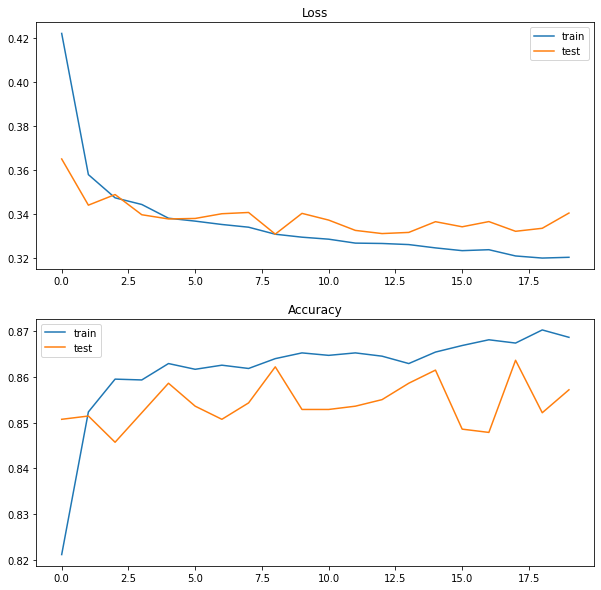

In [ ]:
get_loss_accuracy_graphs(history_11)

##Model Confusion Matrix

In [ ]:
y_pred=tf.round(model_11.predict(X_test))

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2243,  130],
       [ 291,  336]])

In [ ]:
cm=confusion_matrix(y_test,y_pred)*100/len(y_test)

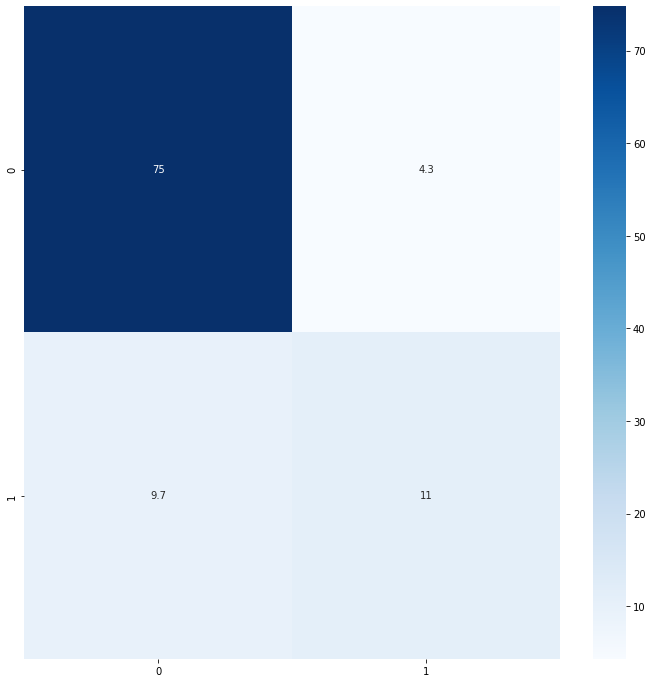

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm,cmap='Blues',annot=True)